In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [2]:
data_raw = pd.read_csv('C:\\Users\\DELL\\Desktop\\Akshay\\Datasets\\credit_card_approval\\credit_card_dataset_train.csv')

In [3]:
data_raw.head(10)

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,?,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,2,?,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,3,?,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,4,?,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,5,?,26.5,2.710,y,p,?,?,0.085,f,f,0,f,s,80,0,-
5,6,?,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,263,0,-
6,7,?,42.25,1.750,y,p,?,?,0.000,f,f,0,t,g,150,1,-
7,8,?,33.17,2.250,y,p,cc,v,3.500,f,f,0,t,g,200,141,-
8,9,a,38.58,5.000,u,g,cc,v,13.500,t,f,0,t,g,980,0,-
9,10,a,19.17,0.585,y,p,aa,v,0.585,t,f,0,t,g,160,0,-


In [4]:
data_raw.tail(10)

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
580,581,b,38.67,0.210,u,g,k,v,0.085,t,f,0,t,g,280,0,+
581,582,b,25.75,0.750,u,g,c,bb,0.250,t,f,0,f,g,349,23,+
582,583,a,46.08,3.000,u,g,c,v,2.375,t,t,8,t,g,396,4159,+
583,584,a,21.5,6.000,u,g,aa,v,2.500,t,t,3,f,g,80,918,+
584,585,?,20.08,0.125,u,g,q,v,1.000,f,t,1,f,g,240,768,+
585,586,b,20.5,2.415,u,g,c,v,2.000,t,t,11,t,g,200,3000,+
586,587,a,29.5,0.460,u,g,k,v,0.540,t,t,4,f,g,380,500,+
587,588,b,16.17,0.040,u,g,c,v,0.040,f,f,0,f,g,0,0,+
588,589,b,22.67,0.165,u,g,c,j,2.250,f,f,0,t,s,0,0,+
589,590,a,25.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+


In [5]:
data_raw.columns

Index(['Key', 'Male', 'Age', 'Debt', 'Married', 'BankCustomer',
       'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault',
       'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode',
       'Income', 'Approved'],
      dtype='object')

In [6]:
data_raw.dtypes

Key                 int64
Male               object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
Approved           object
dtype: object

In [7]:
data_raw.shape

(590, 17)

In [8]:
data_raw.describe(include='all')

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
count,590.000000,590,590,590.000000,590,590,590,590,590.000000,590,590,590.000000,590,590,590,590.000000,590
unique,NaN,3,322,NaN,4,4,15,10,NaN,2,2,NaN,2,3,156,NaN,2
top,NaN,b,?,NaN,u,g,c,v,NaN,f,f,NaN,f,g,0,NaN,-
freq,NaN,400,12,NaN,434,434,119,341,NaN,299,350,NaN,327,530,106,NaN,358
mean,295.500000,NaN,NaN,4.609390,NaN,NaN,NaN,NaN,2.088534,NaN,NaN,2.045763,NaN,NaN,NaN,918.706780,NaN
std,170.462606,NaN,NaN,4.849569,NaN,NaN,NaN,NaN,3.198681,NaN,NaN,3.702375,NaN,NaN,NaN,5025.415369,NaN
min,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN
25%,148.250000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN
50%,295.500000,NaN,NaN,2.710000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,4.000000,NaN
75%,442.750000,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,2.000000,NaN,NaN,NaN,363.000000,NaN


#### Observations:
1. Continuous Variables: Key, Debt, Years Employed, Credit Scores, Income
2. Discrete Numerical Variables: Age
3. Discrete Categorical: Male (Gender), Married (Marital Status), Bank Customer, Education Level, Employed (Employement), Drivers License, Zip Code
4. Target: Approved
    

In [9]:
data_raw.isnull().sum()

Key               0
Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [10]:
data_with_null = data_raw.replace('?', np.nan)
data_with_null['Married'] = data_with_null['Married'].replace('l', np.nan)
data_with_null['BankCustomer'] = data_with_null['BankCustomer'].replace('gg', np.nan)

data_with_null.isnull().sum()

Key                0
Male              11
Age               12
Debt               0
Married            8
BankCustomer       8
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [11]:
data_with_null.describe(include='all')

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
count,590.000000,579,578,590.000000,582,582,581,581,590.000000,590,590,590.000000,590,590,577,590.000000,590
unique,NaN,2,321,NaN,2,2,14,9,NaN,2,2,NaN,2,3,155,NaN,2
top,NaN,b,22.67,NaN,u,g,c,v,NaN,f,f,NaN,f,g,0,NaN,-
freq,NaN,400,8,NaN,434,434,119,341,NaN,299,350,NaN,327,530,106,NaN,358
mean,295.500000,NaN,NaN,4.609390,NaN,NaN,NaN,NaN,2.088534,NaN,NaN,2.045763,NaN,NaN,NaN,918.706780,NaN
std,170.462606,NaN,NaN,4.849569,NaN,NaN,NaN,NaN,3.198681,NaN,NaN,3.702375,NaN,NaN,NaN,5025.415369,NaN
min,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN
25%,148.250000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN
50%,295.500000,NaN,NaN,2.710000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,4.000000,NaN
75%,442.750000,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,2.000000,NaN,NaN,NaN,363.000000,NaN


## Feature Engineering

### Variable: Approved

In [16]:
#Mapping Variable Approved into Logical Categories
data_with_null['approval'] = data_with_null['Approved'].replace({'+':1, '-':0})

### Variable: Key

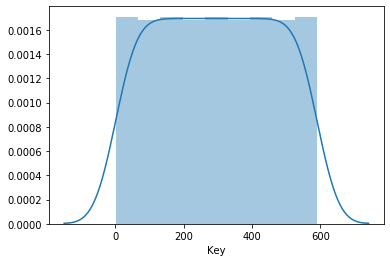

In [18]:
sns.distplot(data_with_null['Key'])

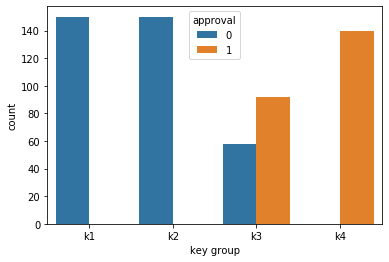

In [20]:
#Binning Variable Key into Logical Categories
bins = [0, 150, 300, 450, 600]
labels = ['k1', 'k2', 'k3', 'k4']
data_with_null['key group'] = pd.cut(data_with_null['Key'], bins, labels=labels)

#Countplot of the variable Key Group
sns.countplot(x='key group', hue='approval', data=data_with_null)

### Variable: Debt

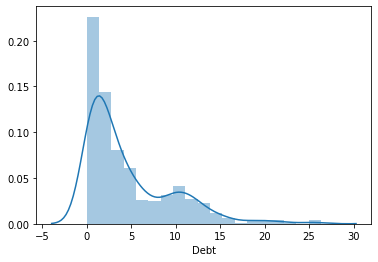

In [14]:
sns.distplot(data_with_null['Debt'])

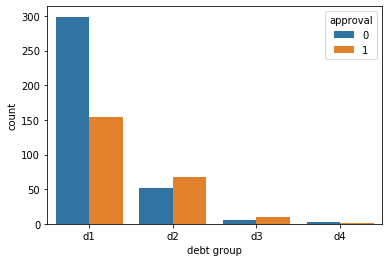

In [21]:
#Binning Variable Debt into Logical Categories
bins = [-1, 7.5, 15, 22.5, 30]
labels = ['d1', 'd2', 'd3', 'd4']
data_with_null['debt group'] = pd.cut(data_with_null['Debt'], bins, labels=labels)

#Countplot for the variable Debt Group
sns.countplot(x=data_with_null['debt group'], hue=data_with_null['approval'])

### Feature: Years Employed

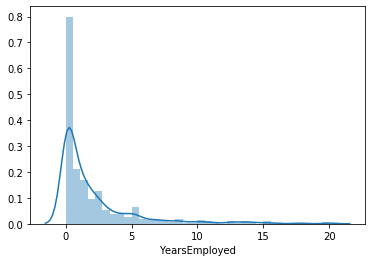

In [22]:
sns.distplot(data_with_null['YearsEmployed'])

In [24]:
data_with_null['YearsEmployed'] = data_with_null['YearsEmployed'].round(1)
data_with_null['YearsEmployed'].describe()

count    590.000000
mean       2.086610
std        3.202351
min        0.000000
25%        0.200000
50%        1.000000
75%        2.500000
max       20.000000
Name: YearsEmployed, dtype: float64

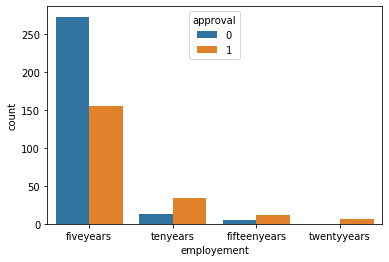

In [25]:
#Binning Variable Years Employed into Logical Categories
bins = [0, 5, 10, 15, 21]
labels = ['fiveyears', 'tenyears', 'fifteenyears', 'twentyyears']
data_with_null['employement'] = pd.cut(data_with_null['YearsEmployed'], bins, labels=labels)

#Countplot for the varibale Employement
sns.countplot(x=data_with_null['employement'], hue=data_with_null['approval'])

### Feature: Credit Score

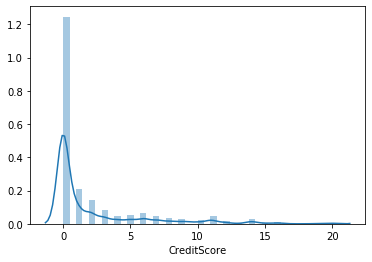

In [28]:
sns.distplot(data_with_null['CreditScore'])

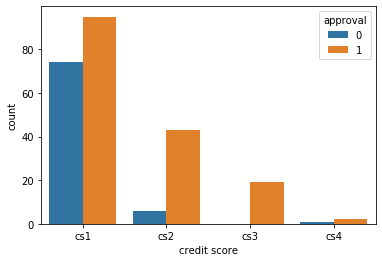

In [29]:
#Binning Variable Credit Score into Logical Categories
bins = [0, 6, 11, 16, 21]
labels = ['cs1', 'cs2', 'cs3', 'cs4']
data_with_null['credit score'] = pd.cut(data_with_null['CreditScore'], bins, labels=labels)

#Countplot for the variable Credit Score
sns.countplot(x='credit score', hue='approval', data=data_with_null)

### Feature: Income

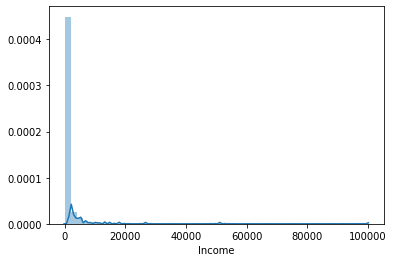

In [61]:
sns.distplot(data_with_null['Income'])

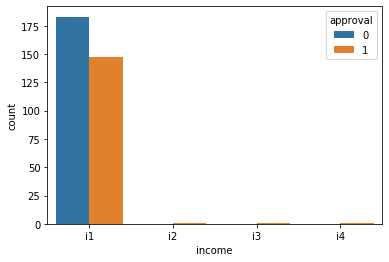

In [62]:
#Binning Variable Income into Logical Categories
bins = [0, 25001, 50001, 75001, 100001]
labels = ['i1', 'i2', 'i3', 'i4']
data_with_null['income'] = pd.cut(data_with_null['Income'], bins, labels=labels)

#Countplot for the variable Income
sns.countplot(x='income', hue='approval', data=data_with_null)

### Feature: Age

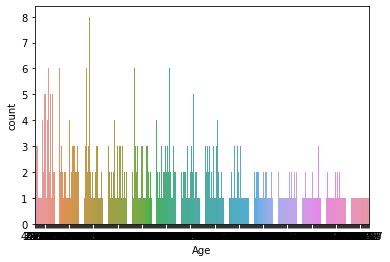

In [52]:
sns.countplot(x=data_with_null['Age'])

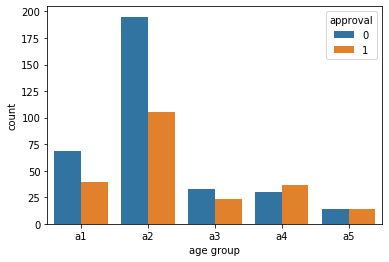

In [58]:
data_with_null['Age'] = data_with_null['Age'].astype(float)
data_with_null['Age'].round(1)
#Binning Variable Age into Logical Categories
bins = [0, 21, 35, 40, 50, 60]
labels = ['a1', 'a2', 'a3', 'a4', 'a5']
data_with_null['age group'] = pd.cut(data_with_null['Age'], bins, labels=labels)

#Countplot for the valriable Age Group
sns.countplot(x='age group', hue='approval', data=data_with_null)

### Feature: Male

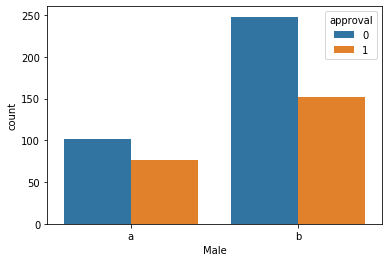

In [59]:
sns.countplot(x='Male', hue='approval', data=data_with_null)

### Feature: Married

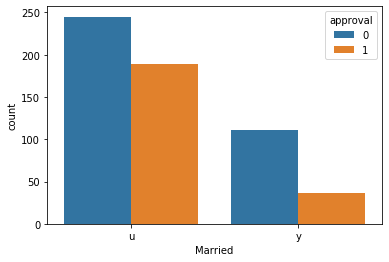

In [60]:
sns.countplot(x='Married', hue='approval', data=data_with_null)

### Feature: Bank Customer

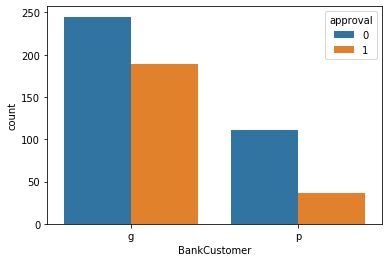

In [63]:
sns.countplot(x='BankCustomer', hue='approval', data=data_with_null)

### Feature: Education Level

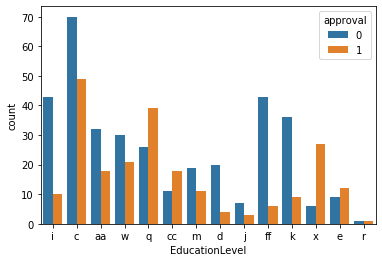

In [65]:
sns.countplot(x='EducationLevel', hue='approval', data=data_with_null)

### Feature: Employed

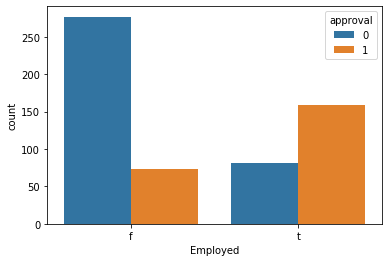

In [66]:
sns.countplot(x='Employed', hue='approval', data=data_with_null)

### Feature: Drivers License

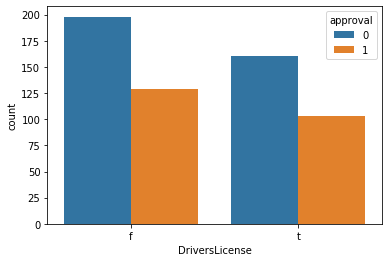

In [67]:
sns.countplot(x='DriversLicense', hue='approval', data=data_with_null)

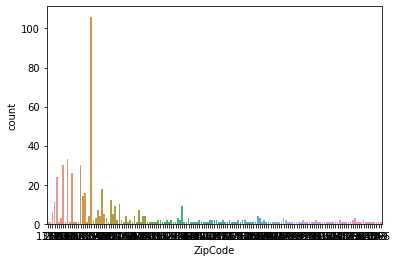

In [30]:
sns.countplot(x=data_with_null['ZipCode'])

In [80]:
data_with_null['ZipCode'].value_counts().to_dict()

{'0': 106,
 '160': 33,
 '200': 30,
 '120': 30,
 '100': 26,
 '80': 24,
 '280': 18,
 '180': 16,
 '140': 14,
 '320': 12,
 '300': 11,
 '240': 10,
 '220': 9,
 '60': 9,
 '400': 7,
 '340': 7,
 '260': 6,
 '360': 5,
 '380': 5,
 '232': 4,
 '144': 4,
 '132': 4,
 '108': 4,
 '420': 4,
 '40': 4,
 '440': 4,
 '290': 3,
 '272': 3,
 '70': 3,
 '480': 3,
 '520': 3,
 '150': 3,
 '460': 3,
 '181': 3,
 '176': 2,
 '350': 2,
 '399': 2,
 '228': 2,
 '312': 2,
 '110': 2,
 '216': 2,
 '88': 2,
 '50': 2,
 '560': 2,
 '210': 2,
 '330': 2,
 '352': 2,
 '112': 2,
 '128': 2,
 '154': 2,
 '96': 2,
 '130': 2,
 '73': 2,
 '92': 2,
 '225': 2,
 '20': 2,
 '164': 2,
 '370': 2,
 '720': 2,
 '136': 2,
 '168': 1,
 '163': 1,
 '410': 1,
 '383': 1,
 '121': 1,
 '62': 1,
 '416': 1,
 '93': 1,
 '454': 1,
 '167': 1,
 '141': 1,
 '171': 1,
 '408': 1,
 '94': 1,
 '24': 1,
 '395': 1,
 '510': 1,
 '253': 1,
 '75': 1,
 '221': 1,
 '263': 1,
 '356': 1,
 '640': 1,
 '329': 1,
 '76': 1,
 '29': 1,
 '152': 1,
 '276': 1,
 '252': 1,
 '500': 1,
 '292': 1,
 '348